# xXx_L0n3W0LF_BLT_xXx

## 2 Species Lotka-Volterra Model


\begin{align*}
\frac{dx}{dt} &= ax - bxy \\
\frac{dy}{dt} &= -dy + cxy \\
\end{align*}

Where:<br>
$ \frac{dx}{dt} $ is the rate of change in predator population<br>
$ \frac{dy}{dt} $ is the rate of change in prey population<br>

## Proposed 3 Species Lotka Volterra Model

\begin{align*}
\frac{dx}{dt} &= ax - bxy \\
\frac{dy}{dt} &= -cy + dxy - eyz \\
\frac{dz}{dt} &= -fz + gyz \\
\end{align*}

Where:<br>
$ \frac{dx}{dt} $ is the rate of change in low level prey population<br>
$ \frac{dy}{dt} $ is the rate of change in mid level predator/prey population<br>
$ \frac{dz}{dt} $ is the rate of change in top level predator population<br>

Low level prey is preyed upon by mid level species, mid level speicies is preyed upon by top level species.

## Our 3 Species Lotka-Volterra Model

\begin{align*}
\frac{dT}{dt} &= aT-bLT-cBT \\
\frac{dL}{dt} &= -dL -kLT + mLB \\
\frac{dB}{dt} &= -fB - gBL + nBT \\
\end{align*}

Where:<br>
$ \frac{dT}{dt} $ is the rate of change in Cane Toad Population<br>
$ \frac{dL}{dt} $ is the rate of change in Monitor Lizard Population<br>
$ \frac{dB}{dt} $ is the rate of change in Bird (Crimson Finch) Population<br>

Toads are preyed upon by birds and lizards. Birds are preyed upon by lizards.

Coeffiecients:<br>
a - birthrate of cane toads<br>
b - rate toads die to lizards<br>
c - rate toads die to birds<br>
d - death rate of lizards<br>
h - rate lizards eat other food sources<br>
k - rate lizards die to toads<br>
m - rate lizards eat birds<br>
f - death rate of birds<br>
g - rate birds die to lizards<br>
n - rate birds eat toads<br>
p - rate birds eat alternate food sources

### Assumptions:

- Well mixed population
- Birds/eggs are the same thing (lizards only eat eggs)
- Toads only die if eaten by lizards or birds
- Birds only die if eaten by lizards
- Lizards only sustain off of birds
- If a lizard encounters a toad or a bird, it will eat it
- Lizards always die if they eat a toad
- Birds do not die if they eat a toad

In [1]:
from scipy import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
time = r_[0:43:1000j]

### Our Model

In [17]:
def dPdt(x, t, a0=1, a1=1, a2=1, b0=1, b1=1, b2=1, c0=1, c1=1, c2=1):
    '''Our 3 Species Lotka-Volterra Predator Predator/Prey Prey System.
    
    Parameters:
    x - array of initial populations [Toads, Lizards, Birds]
    t - time
    a0 - birthrate of cane toads
    a1 - rate toads die to lizards
    a2 - rate toads die to birds
    b0 - death rate of lizards
    b1 - rate lizards die to toads
    b2 - rate lizards eat birds
    c0 - death rate of birds
    c1 - rate birds die to lizards
    c2 - rate birds eat toads
    '''
    T, L, B = x
    return([a0*T - a1*L*T - a2*B*T, -b0*L - b1*T*L + b2*L*B, -c0*B - c1*B*L + c2*B*T])

In [19]:
P1 = odeint(dPdt,[1,1,1],time)

<IPython.core.display.Javascript object>


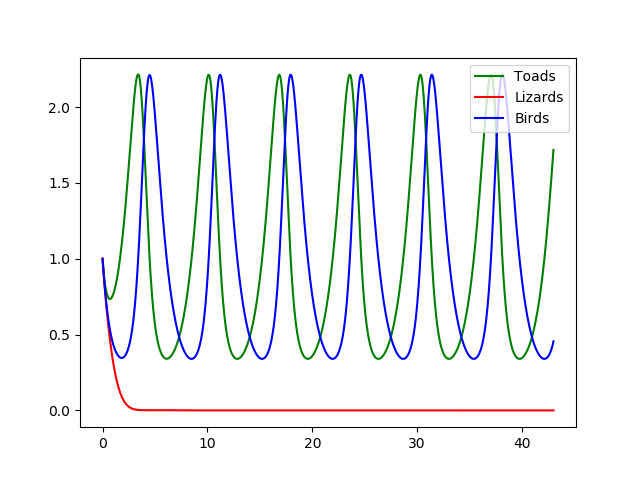

In [20]:
plt.figure()
plt.plot(time,P1[:,0],'g')
plt.plot(time,P1[:,1],'r')
plt.plot(time,P1[:,2],'b')
plt.legend(('Toads','Lizards','Birds'), loc = 1)
plt.show()

### Easy to Run Cell:

<IPython.core.display.Javascript object>


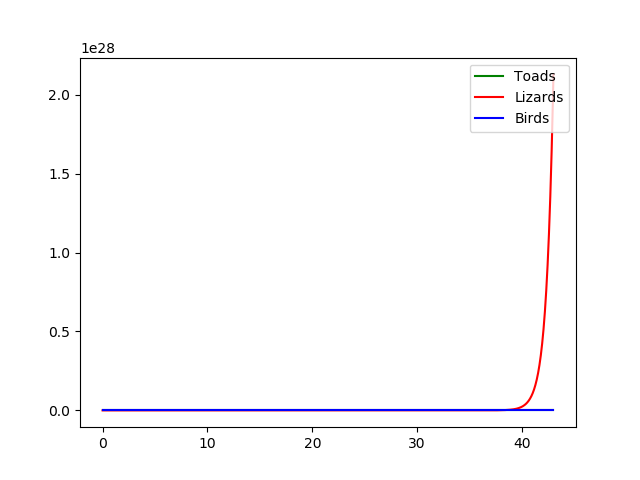

In [7]:
def dPdt2(x, t, a0=1, a1=1, a2=1, b0=1.5, b1=1, b2=1, b3=1, c0=1, c1=1, c2=1, c3=1):
    '''Our 3 Species Lotka-Volterra Predator Predator/Prey Prey System.
    
    Parameters:
    x - array of initial populations [Toads, Lizards, Birds]
    t - time
    a0 - birthrate of cane toads
    a1 - rate toads die to lizards
    a2 - rate toads die to birds
    b0 - natural growth rate of lizards
    b1 - rate lizards die to toads
    b2 - rate lizards eat birds
    b3 - rate lizards eat other food sources
    c0 - death rate of birds
    c1 - rate birds die to lizards
    c2 - rate birds eat toads
    c3 - rate birds eat alternate food sources
    '''
    T, L, B = x
    
    a1 = b1
    
    return([a0*T - a1*L*T - a2*B*T, b0*L-b1*T*L + b2*L*B, -c0*B - c1*B*L + c2*B*T+c3*B])

P1 = odeint(dPdt2,[1,2,1],time)

plt.figure()
plt.plot(time,P1[:,0],'g')
plt.plot(time,P1[:,1],'r')
plt.plot(time,P1[:,2],'b')
plt.legend(('Toads','Lizards','Birds'), loc = 1)
plt.show()